# 🚀 Kaggle Competition Entry: Enhanced Bank Customer Churn Prediction ❤️


<img title="a title" alt="Alt text" src="bank-churn-img.png" width=500>


* Author: [Muhammad Bilal Khan](https://www.kaggle.com/devbilalkhan)
* Contact:
    - [Kaggle](https://www.kaggle.com/devbilalkhan)
    - [Twitter](https://twitter.com/devbilalkhan)
    - [Github](https://github.com/devbilalkhan)
* Email: bilal.khan@live.com
* Designation: Software Developer & Consultant
  
## Overview
In this competition, we are tasked with predicting bank customer churn based on a unique dataset. This dataset has been synthetically generated by a deep learning model, which was initially trained on the original Bank Customer Churn Prediction dataset. While the features mirror the original to a degree, subtle differences exist that may influence model predictions.

## Objective
The challenge is to not only develop a predictive model with high accuracy for customer churn but also to identify and leverage the nuances between the synthetic and original datasets. Competitors are encouraged to explore the original dataset alongside the provided one, examining the disparities and potentially utilizing it to enhance model robustness and performance.

## Strategy
My approach will involve a thorough exploratory data analysis to compare the synthetic and original datasets, hypothesis testing to understand feature relationships, and experimenting with various machine learning algorithms. The goal is to create a model that not only excels with the competition data but also gains insights from the original dataset to improve prediction outcomes.

---

Good luck to all participants — may the best model win!

In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_validate
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from xgboost import XGBClassifier
import lightgbm as lgb


The following function `print_heading` is used only for the purpose of printing headings text surrounded by lines to make the output look more readable.

In [250]:
# print heading - for display purposes only
def print_heading(heading):
    print('-' * 50)
    print(heading.upper())
    print('-' * 50)

## Load Dataset

Leveraging the synergy of both the original Bank Customer Churn Prediction dataset and the provided synthetic training data, as encouraged, to potentially enhance model accuracy and generalization.

In [251]:
df = pd.read_csv("../projects/data/train.csv")
original_df = pd.read_csv("../projects/data/main.csv")
df_test = pd.read_csv("../projects/data/test.csv")
submission = pd.read_csv("../projects/data/sample_submission.csv")

# 1.0. Dataset Inspection

In [252]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Data Types in the Dataset

| DataType | Count |
|----------|-------|
| int64    | 6     |
| float64  | 5     |
| object   | 3     |



## Shape of the Data
The dataset consists of records for 165,034 customers, each with 14 features. Below is the summary of the dataset dimensions:

| Description | Count |
|-------------|-------|
| Customers   | 165034|
| Features    | 14    |

## List all columns

In [254]:
# print the columns as a list
print_heading("Columns")

for col in df.columns:
    print(f"- {col}")


--------------------------------------------------
COLUMNS
--------------------------------------------------
- id
- CustomerId
- Surname
- CreditScore
- Geography
- Gender
- Age
- Tenure
- Balance
- NumOfProducts
- HasCrCard
- IsActiveMember
- EstimatedSalary
- Exited


In [255]:
original_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [256]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [257]:
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


# Dataset Summary Information

In [258]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Observation
- **CreditScore**: The average credit score in the dataset is approximately `656`, with a standard deviation of around `80`. The scores range from a minimum of `350` to a maximum of `850`, which suggests a wide variety of creditworthiness among the customers.

- **Age**: Customers have an average age of about `38 years` with a standard deviation of nearly `9 years`, indicating moderate age diversity. The age range is from `18 to 92 years`, showing that the dataset includes young adults to seniors.

- **Balance**: The mean account balance is about `55,478`, but with a large standard deviation of approximately `62,818`, indicating significant variability in customer balances. Notably, `25%` of customers have a balance of `0`, which could indicate a segment of customers that do not use their accounts actively.

- **Exited**: Approximately `21%` of customers have exited (the `Exited` column has a mean of `0.21`), pointing towards a churn rate that could be of interest for retention strategies. This is a binary variable, with `0` representing the customer has not exited and `1` representing the customer has exited.

In [259]:
target = "Exited"

# Duplicates Removal and Merging Datasets

In [260]:
df.duplicated().sum()

0

In [261]:
print_heading("Duplicated Rows")
original_df.duplicated().sum()

--------------------------------------------------
DUPLICATED ROWS
--------------------------------------------------


2

In [262]:
# drop id and rownumber
original_df = original_df.drop("RowNumber", axis=1)
df = df.drop("id", axis=1)

## Merge the datasets

In [263]:
df = pd.concat([df, original_df], axis=0)

In [264]:
df.shape

(175036, 13)

In [265]:
df = df.drop_duplicates()

In [266]:
print_heading("Duplicated Rows")
df.duplicated().sum()

--------------------------------------------------
DUPLICATED ROWS
--------------------------------------------------


0

# What happens if we don't handle missing values?

## What are missing values?
Missing values are defined as the data points in the dataset that are not present or have not been recorded. They can occur due to various reasons such as errors in data collection, failure to fill in a value, or when an observation is not applicable or available.

If missing values are not handled, it can lead to skewed or incorrect analysis results because many algorithms cannot process `undefined` or `missing` or `unpresentable` values and may produce errors. Additionally, models trained on incomplete data may be biased or less accurate, undermining the reliability of predictions or inferences drawn from the dataset.

In [267]:
print_heading("Missing Values")
df.isna().sum()

--------------------------------------------------
MISSING VALUES
--------------------------------------------------


CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

## Drop Missing values values

In [268]:
df = df.dropna()

In [269]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Shape of the Data

| Description | Count |
|-------------|-------|
| Customers   | 175036|
| Features    | 13    |

# Inspecting Labels of Categorical Variables

In [270]:
# Select the categorical variables
categorical_variables = df.select_dtypes(include=['object', 'category']).columns
# drop Surname feature from cat
categorical_variables = categorical_variables.drop('Surname')
value_counts_dict = {}

# Get the value count 
for variable in categorical_variables:
    value_counts_dict[variable] = df[variable].value_counts()

# Initialize an empty list to store the data
data_list = []

# Append a tuple to the list for each category
for variable, counts in value_counts_dict.items():
    for category, count in counts.items():
        data_list.append((variable, category, count))
        
# Append an empty tuple to create a gap between variables
    data_list.append(("---", "---", "---"))

# Convert the list of tuples into a DataFrame
value_counts_df = pd.DataFrame(data_list, columns=['Variable', 'Category', 'Count'])

# Make the variable column as an index
value_counts_df = value_counts_df.set_index('Variable')

# Display the DataFrame
value_counts_df

,Category,Count
Variable,,
Geography,France,99226
Geography,Spain,38689
Geography,Germany,37115
---,---,---
Gender,Male,98604
Gender,Female,76426
---,---,---


# Observations
* **Geographic Distribution:** There is a significant imbalance in the geographic distribution of the dataset. France has the highest representation with `94,215` entries, which is substantially more than Spain and Germany, with `36,213` and `34,606` entries respectively.

* **Gender Distribution:** The dataset shows an imbalance in gender with more `males (93,150)` than females `(71,884)`. However, the disparity is not as pronounced as it is in the geographic distribution.


# Inspecting Labels of Target Variable

In [271]:
exited_df = df[target].value_counts()
pd.DataFrame(exited_df)

,count
Exited,
0,138072
1,36958


# Observations
* **Retention Rate:** The majority of the customers in the dataset have not exited, with `130,113` customers still with the bank. This suggests that the bank has a strong retention rate overall.

* **Churn Rate**: There are `34,921` customers who have exited, which indicates that there is a churn issue that the bank could potentially address. While the number of customers remaining with the bank is higher, the churn rate is still significant.

* **Customer Insights:** The data on churn could be further analyzed to understand why these customers are leaving. Insights from this analysis could inform retention strategies.

* **Improvement Opportunity:** The bank has an opportunity to improve its churn rate by identifying the factors that contribute to customer exit and addressing them. This could involve looking at customer service, pricing, product offerings, and other aspects that impact customer satisfaction and loyalty.

# Correlation Matrix

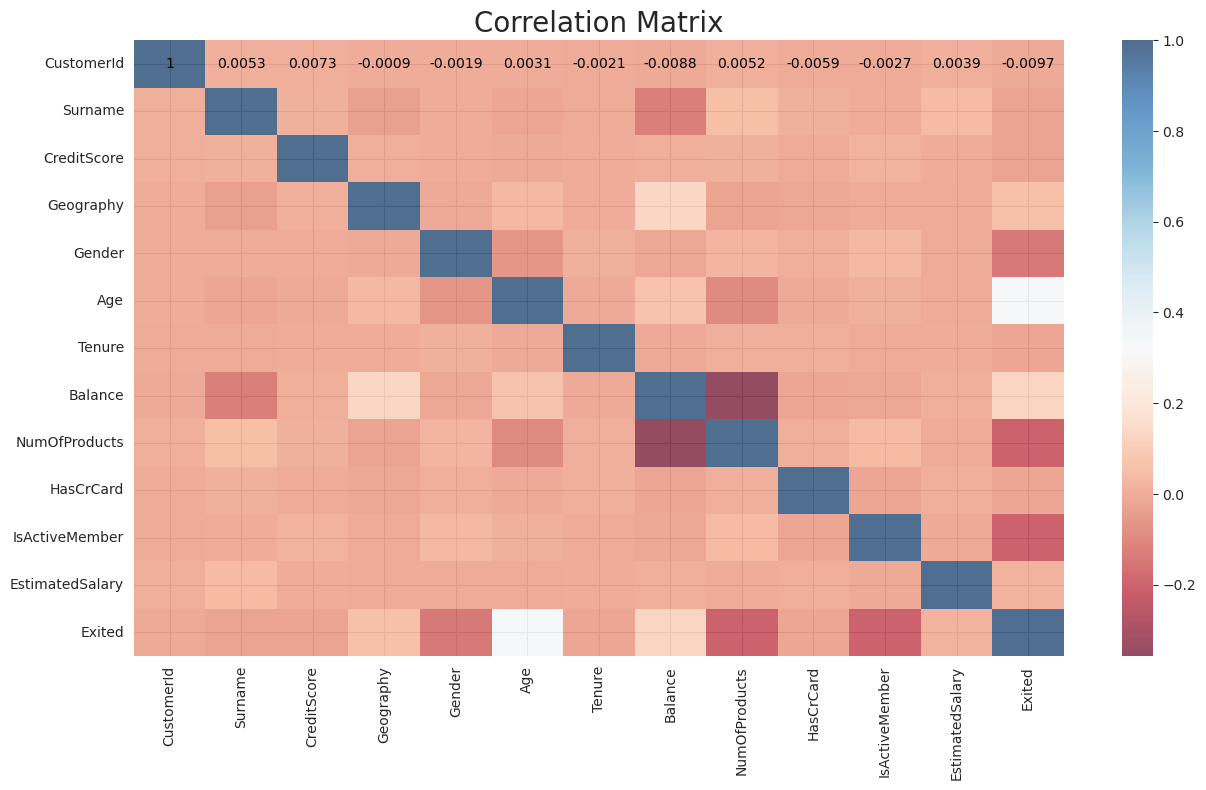

In [272]:
# generate correlation matrix for all features after label encoding 
df2 = df.copy()
sns.set_palette("pastel")
cat_cols = df2.select_dtypes(include=['object', 'category']).columns
for col in cat_cols:
    df2[col] = LabelEncoder().fit_transform(df2[col])


correlation_matrix = df2.corr()
sort_corr_features = correlation_matrix.index 
#plot correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(df2[sort_corr_features].corr(), annot=True, cmap='RdBu', alpha=0.7, square=False, annot_kws={"color": "black"})
plt.title('Correlation Matrix', fontsize=20)
plt.show()

## Correlation With Respect to Target Variable

In [273]:
# calculate the correlation of each feature with the target variable and sort in descending order
correlation = correlation_matrix[target].sort_values(ascending=False)
print_heading('Correlation of each feature with the target variable')
correlation

--------------------------------------------------
CORRELATION OF EACH FEATURE WITH THE TARGET VARIABLE
--------------------------------------------------


Exited             1.000000
Age                0.336606
Balance            0.128389
Geography          0.052202
EstimatedSalary    0.018598
CustomerId        -0.009723
Tenure            -0.019244
HasCrCard         -0.021122
Surname           -0.027017
CreditScore       -0.027241
Gender            -0.144131
NumOfProducts     -0.204509
IsActiveMember    -0.207205
Name: Exited, dtype: float64

# Observations
* **Highest Positive Correlation (Age):** With a correlation coefficient of `0.340768`, age shows the highest positive association with the target variable among the features listed. This indicates a trend where older customers are more prone to exit, hinting at a moderate tendency for customer churn.

* **Highest Negative Correlation (NumOfProducts):** With a correlation of `-0.214554`, the number of products a customer uses is the most negatively correlated feature with exiting. This implies that customers using more products are less likely to exit.

* **Near Zero Correlation (id, CustomerId):** The features id and CustomerId have correlations of `0.002512` and `-0.009947`, respectively, which are very close to zero. This indicates that these features have virtually no linear relationship with the likelihood of a customer exiting.

In [274]:
scale_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary']

# apply min max scaler to each but add addiotnal columns
for col in scale_cols:
   min_val = df[col].min()
   max_val = df[col].max()
   df[col + '_scaled'] = (df[col] - min_val) / (max_val - min_val)
   df_test[col + '_scaled'] = (df_test[col] - min_val) / (max_val - min_val)
   

# Impact of Skewness on Model Performance 

Skewness in a dataset can lead to biased or inaccurate model predictions as many algorithms assume a normal distribution of data. Addressing skewness through transformations or robust model selection is crucial for improving model reliability.

In [275]:
# Generate a skew value table for numerical columns
skew_values = df[num_cols].skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'Skew': skew_values})
skew_df

,Skew
Age,0.979865
Balance,0.350618
Tenure,0.006725
CreditScore,-0.065980
EstimatedSalary,-0.294994


# Test with Machine Learning Models

In [276]:
X = df.drop(['Exited', 'CustomerId', 'Surname'], axis=1)
y = df['Exited']

# import train_test_split
from sklearn.model_selection import train_test_split

# encode
le = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = le.fit_transform(X[col])
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Optimizing LightGBM Classifier with GridSearchCV and Cross-Validation

In [277]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
# Define the model
model = lgb.LGBMClassifier(random_state=42, verbose=0)

# Define the parameter grid you want to search over
param_grid = {
    # Example parameters: Adjust as needed
    'n_estimators': [100, 200],
    # 'learning_rate': [0.01, 0.05, 0.1],
    # 'max_depth': [3, 5, 7],
    # Add other parameters here
  'verbose': [0],
  'force_row_wise':[True]
}
metrics = []
# Define your custom scoring dictionary
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}

# Initialize GridSearchCV with the model, parameter grid, and scoring
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring=scoring,
    refit='f1',  # Refit using the scorer that gives the best f1 scores
    cv=5,
    verbose=False
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)
cv_results = cross_validate(model, X_train, y_train, cv=5,scoring="accuracy")
# Calculate metrics using the best model
accuracy = round(accuracy_score(y_test, y_pred), 5)
precision = round(precision_score(y_test, y_pred, average='weighted'), 5)
recall = round(recall_score(y_test, y_pred, average='weighted'), 5)
f1 = round(f1_score(y_test, y_pred, average='weighted'), 5)

# Append metrics to the results list
metrics.append([accuracy, precision, recall, f1])

# Print the best parameters and the corresponding accuracy
print_heading("Perfomance")

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}")

--------------------------------------------------
PERFOMANCE
--------------------------------------------------
Accuracy: 0.86622, Precision: 0.85846, Recall: 0.86622, F1: 0.85882


In [278]:
results_df = pd.DataFrame(metrics, columns=['accuracy', 'precision', 'recall', 'f1_score'])
# sort based on accuracy
results_df.sort_values(by='accuracy', ascending=False, inplace=True)
results_df

,accuracy,precision,recall,f1_score
0,0.86622,0.85846,0.86622,0.85882


In [279]:
df_test = df_test.drop(['id', 'CustomerId', 'Surname'], axis=1)

# use label encoding to encode categorical features
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtype == 'object' or df_test[col].dtype == 'category':
        df_test[col] = le.fit_transform(df_test[col])

In [280]:
y_pred = best_model.predict_proba(X_test)[:,1]


In [183]:
# import auc roc
from sklearn.metrics import roc_auc_score

print_heading("AUC ROC")
roc_auc_score(y_test, y_pred)



--------------------------------------------------
AUC ROC
--------------------------------------------------


0.889237920177416

In [184]:
# convert cat features to numerical via label encoding
le = LabelEncoder()
for col in df_test.columns:
    if df_test[col].dtype == 'object' or df_test[col].dtype == 'category':
        df_test[col] = le.fit_transform(df_test[col])

In [185]:
# apply min max scaler to each but add numerical columns
# import min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_test = df_test.copy()

# Select numerical columns (exclude object types which are usually categorical)
numerical_columns = scaled_test.select_dtypes(include=['int64', 'float64']).columns
numerical_columns.drop(['Age_scaled', 'CreditScore_scaled', 'Balance_scaled',
       'EstimatedSalary_scaled'])
# # Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
df_test[numerical_columns] = scaler.fit_transform(scaled_test[numerical_columns])

# Binary Classification Using PCA-Reduced Features and Deep Learning

In [54]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping


pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_tf = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_pca.shape[1],)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Define the callback function
early_stopping = EarlyStopping(patience=20)

# Compile the model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loss and accuracy at each epoc
history = model_tf.fit(X_train_pca, y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_test_pca, y_test), 
                    callbacks=[early_stopping])


2024-01-23 23:29:02.273309: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 23:29:05.932318: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
4376/4376 [==============================] - 43s 10ms/step - loss: 0.3502 - accuracy: 0.8523 - val_loss: 0.3294 - val_accuracy: 0.8606
Epoch 2/100
4376/4376 [==============================] - 43s 10ms/step - loss: 0.3302 - accuracy: 0.8609 - val_loss: 0.3251 - val_accuracy: 0.8640
Epoch 3/100
4376/4376 [==============================] - 37s 8ms/step - loss: 0.3278 - accuracy: 0.8626 - val_loss: 0.3264 - val_accuracy: 0.8632
Epoch 4/100
4376/4376 [==============================] - 37s 8ms/step - loss: 0.3265 - accuracy: 0.8633 - val_loss: 0.3247 - val_accuracy: 0.8631
Epoch 5/100
4376/4376 [==============================] - 41s 9ms/step - loss: 0.3262 - accuracy: 0.8630 - val_loss: 0.3237 - val_accuracy: 0.8643
Epoch 6/100
4376/4376 [==============================] - 51s 12ms/step - loss: 0.3253 - accuracy: 0.8636 - val_loss: 0.3245 - val_accuracy: 0.8641
Epoch 7/100
4376/4376 [==============================] - 41s 9ms/step - loss: 0.3251 - accuracy: 0.8637 - val_loss: 0.324

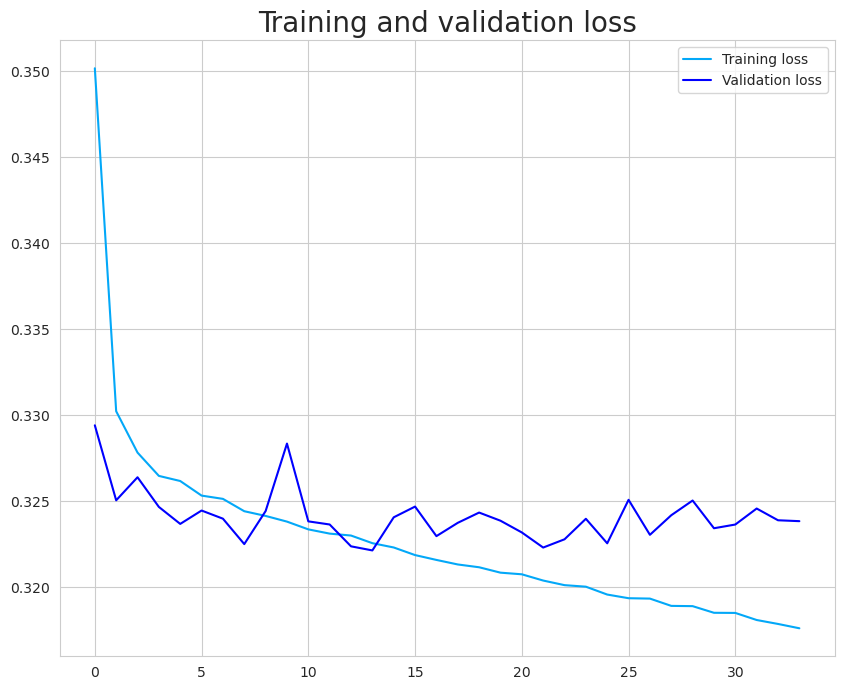

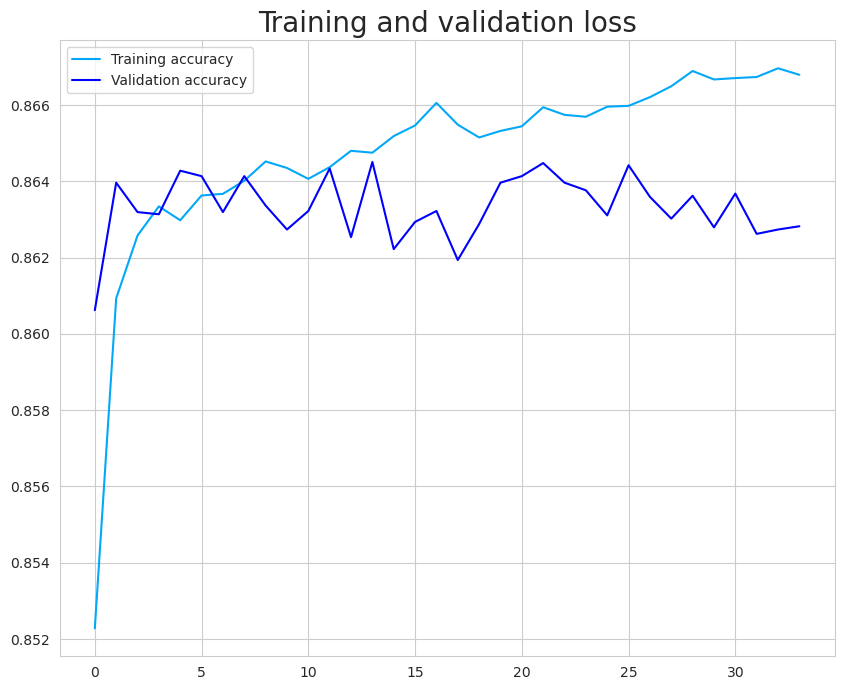

In [74]:
# plot the training and testing loss and accuracy at each epoc
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['loss'], label='Training loss', color="#03a8F8")
ax.plot(history.history['val_loss'], label='Validation loss', color="#0000ff")
plt.title('Training and validation loss', fontsize=20)
ax.legend()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(history.history['accuracy'], label='Training accuracy', color='#03a8F8')
ax.plot(history.history['val_accuracy'], label='Validation accuracy', color="#0000ff")
plt.title('Training and validation loss', fontsize=20)
ax.legend()
plt.show()

In [75]:
y_pred = model_tf.predict(X_test_pca)
print("Predictions", y_pred)


1094/1094 [==============================] - 8s 7ms/step
Predictions [[0.27610207]
 [0.15641804]
 [0.01281734]
 ...
 [0.07848687]
 [0.83465934]
 [0.43869513]]
